In [103]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from statistics import mean
from tqdm import tqdm
from dataloader import *
from model import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [104]:
# Batch size and noise strength
batch_size = 500
noise_lambda = 128

In [105]:
# train_loader, test_loader = data_prep(noise_lambda, batch_size_train=batch_size, batch_size_test=batch_size)
train_loader, test_loader_32, test_loader_64, test_loader_128 = data_prep_3_loaders(noise_lambda, batch_size_train=batch_size, batch_size_test=batch_size)

Trainset size: 60000
Testset size: 10000
Testset size: 10000
Testset size: 10000


In [106]:
# Data visualization
batch_idx, (example_data, example_targets) = next(enumerate(train_loader))

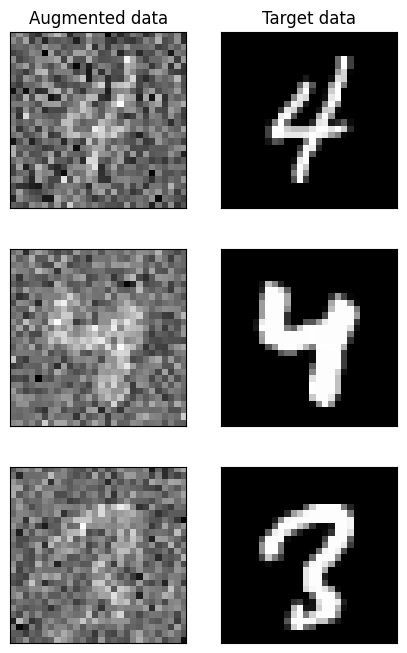

In [107]:
fig = plt.figure(figsize=(5, 8))
for i in range(0,6,2):
  plt.subplot(3,2,i+1)
  if i == 0:
    plt.title("Augmented data")
  plt.imshow(example_data[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,2,i+2)
  if i == 0:
    plt.title("Target data")
  plt.imshow(example_targets[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [108]:
model = CONV().to(device)

In [109]:
loss_module = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

Training: 0it [00:00, ?it/s]

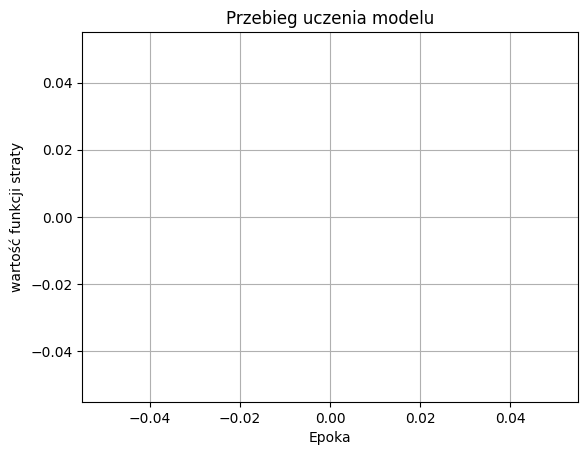

In [110]:
train_losses = []
num_epochs = 0

model.train()
for i in tqdm(range(num_epochs), disable=False, desc='Training'):
    for x, y in train_loader:
        x = x.reshape(-1, 1, 28, 28).to(device)
        y = y.reshape(-1, 28*28).to(device)
        optimizer.zero_grad()
        preds = model(x)
        loss = loss_module(preds, y)
        loss.backward()
        optimizer.step()
    # print(f'Epoch: [{i+1}/{num_epochs}] \t Loss: {loss:.2f}')
    train_losses.append(loss.item())
plt.plot(train_losses)
plt.title("Przebieg uczenia modelu")
plt.xlabel("Epoka")
plt.ylabel("wartość funkcji straty")
plt.grid()
plt.show()

In [111]:
# model.load_state_dict(torch.load( f"./trained_models/CONV_noise_lambda_{noise_lambda}.tar", map_location=device))
model.load_state_dict(torch.load( f"./trained_models/CONV_noise_lambda_128.tar", map_location=device))

<All keys matched successfully>

Test loss: 3647.32


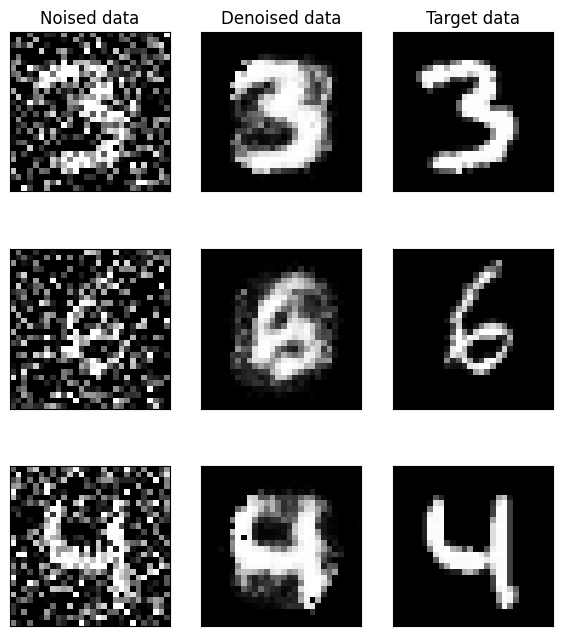

In [112]:
# Evaluation
preds_list = []
out_list = []
input_list = []
test_losses = []

model.eval()
for x, y in test_loader_128:
    x = x.reshape(-1, 1, 28, 28).to(device)
    y = y.reshape(-1, 28*28).to(device)
    optimizer.zero_grad()
    preds = model(x)
    input_list.append(x)
    preds_list.append(preds)
    out_list.append(y)
    loss = loss_module(preds, y)
    test_losses.append(loss.item())
print(f'Test loss: {mean(test_losses):.2f}')

# Visualize results
fig = plt.figure(figsize=(7, 8))
for i in range(0,9,3):
  plt.subplot(3,3,i+1)
  if i == 0:
    plt.title(f'Noised data')
  plt.imshow(input_list[i+1].cpu().detach().numpy()[0].reshape(28,28), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+2)
  if i == 0:
    plt.title('Denoised data')
  plt.imshow(preds_list[i+1].cpu().detach().numpy()[0].reshape(28,28), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+3)
  if i == 0:
    plt.title('Target data')
  plt.imshow(out_list[i+1].cpu().detach().numpy()[0].reshape(28,28), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [113]:
# torch.save(model.state_dict(), f"./trained_models/CONV_noise_lambda_{noise_lambda}.tar")